In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Downloads/Housing.csv")


In [3]:
# 3. Basic EDA
print(df.head())
print(df.info())
print(df.describe())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [18]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Detect all object (non-numeric) columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# Step 2: Manually convert 'yes'/'no' columns to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Step 3: Encode the remaining categorical columns
# Check again for any remaining object-type columns
remaining_cats = df.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in remaining_cats:
    df[col] = le.fit_transform(df[col])

Categorical columns: ['prefarea']


In [19]:
print(df.dtypes)

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad            float64
guestroom           float64
basement            float64
hotwaterheating     float64
airconditioning     float64
parking               int64
prefarea              int32
furnishingstatus      int64
dtype: object


In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Label encode all object (non-numeric) columns
label_enc = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_enc.fit_transform(df[col])

# Step 2: Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Step 3: Impute any missing values in X
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [46]:

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Train
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [50]:
# Predict and Evaluate
y_pred = model.predict(X_test)


In [51]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.6494754192267804
RMSE: 1331071.4167895105


C:\Users\INDUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
print(X.dtypes)  # should show only float or int
print(X.isnull().sum().sum())  # should print 0


area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad            float64
guestroom           float64
basement            float64
hotwaterheating     float64
airconditioning     float64
parking             float64
prefarea            float64
furnishingstatus    float64
dtype: object
0


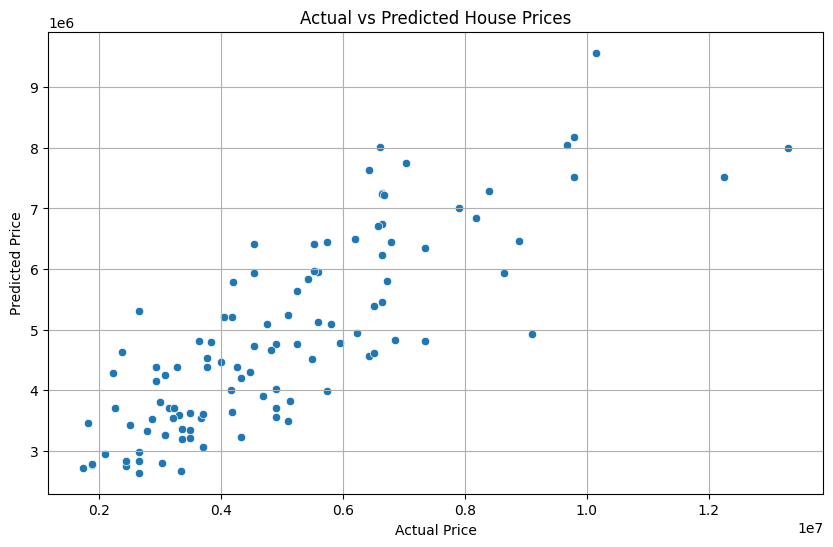

In [45]:
# 9. Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()